# 生活中的圖論
## 林晉宏（Jephian Lin）
##### 中山大學數學營演講

This file was built on  
* SageMath 8.6 
* Jupyter 4.4.0
* CoCalc

Thanks to these softwares this lecture was made possible.

## 主題
1. 一筆劃問題（Eulerian circuit）
2. 多面體公式（Euler's polyhedron formula）
3. 圖著色問題（Graph coloring problem）
4. 搜尋演算法（Searching algorithm）

## 1. 一筆劃問題（Eulerian circuit）

李昂哈德·歐拉 Leonhard Euler (1707&ndash;1783)
![Euler](Euler.png "Leonhard Euler")

(Portrait by Jakob Emanuel Handmann  
Source: [Wikipedia: Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler))

在歐拉的時代  
東普魯士的柯尼斯堡（Königsberg）  
有條河流把城市切成兩岸，中間還有兩座大島  
有七座橋連接著城市的交通

西元 1736 年，歐拉思考著以下的問題。
> **七橋問題：**能不能經過這七座橋_恰好一次_，然後回到原點？

![7bridges](7bridges.png  "Seven Bridges of Königsberg")
(Source: [Wikipedia: Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg))

#### 定義

在圖論中，一個**圖（graph）**  包含有一些**點（vertex）**，還有一些**邊（edge）**；  
其中每條邊連接著兩個點。

一個點的**度數（degree）**指的是連在這個點上的邊數。

圖論中點的位置並不重要，邊怎麼畫也沒關係。

以下網頁可以繪製圖：  
Radoslav Kirov's [JavaScript Graph Editor](https://radokirov.com/graph-editor.js/).

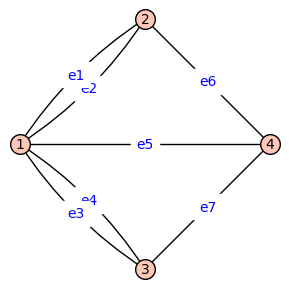

In [1]:
V = [1,2,3,4] ### four vertices
E = [(1,2,'e1'),(1,2,'e2'),(1,3,'e3'),(1,3,'e4'),(1,4,'e5'),(2,4,'e6'),(3,4,'e7')] ### seven edges
pos = {1: (0,0), 2: (1,1), 3: (1,-1), 4: (2,0)}
G = Graph([V,E], multiedges=True, pos=pos)
G.show(figsize=[3,3],edge_labels=True)

In [2]:
G.eulerian_circuit()

False

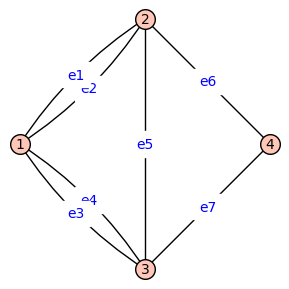

In [3]:
V = [1,2,3,4] ### four vertices
E = [(1,2,'e1'),(1,2,'e2'),(1,3,'e3'),(1,3,'e4'),(2,3,'e5'),(2,4,'e6'),(3,4,'e7')] ### seven edges
pos = {1: (0,0), 2: (1,1), 3: (1,-1), 4: (2,0)}
H = Graph([V,E], multiedges=True, pos=pos)
H.show(figsize=[3,3],edge_labels=True)

In [4]:
H.eulerian_circuit()

[(1, 3, 'e4'),
 (3, 4, 'e7'),
 (4, 2, 'e6'),
 (2, 3, 'e5'),
 (3, 1, 'e3'),
 (1, 2, 'e2'),
 (2, 1, 'e1')]

In [7]:
walk_on_graph(G)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MGYyNDQyYTg+IHdpdGggMiB3aWRnZXRzCiAgbmV4dF9zdGVwOiBUb2dnbGVCdXR0b25zKGRlc2NyaXB0aW9uPXUnbmXigKY=


#### 定義

在一個圖上  
**路徑（walk）**指的是一連串的邊 $v_1v_2, v_2v_3, v_3v_4, \ldots$。  
**迴圈（closed walk）**指的是繞了一圈又回到起點的一條路徑。

而一個圖 $G$ 的**歐拉迴圈（Eulerian circuit）**是指  
一條走過所有邊_恰好一次_的迴圈。

> **一筆劃問題：**哪些圖擁有歐拉迴圈？有的話怎麼找？

#### 觀察
如果一個圖有歐拉迴圈  
那麼每個點的度數都必須是偶數。

#### 結果
七橋問題中的圖並沒有歐拉迴圈。

#### 定義
如果一個圖上任兩個點都有一條路徑相連  
我們說這個圖是**連通的（connected）**。

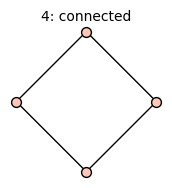

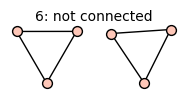

In [8]:
sshow(graphs.CycleGraph(4),'connected')

sshow(graphs.CycleGraph(3).disjoint_union(graphs.CycleGraph(3)),'not connected')

#### 觀察
如果一個圖有歐拉迴圈  
那麼這個圖必須是連通的。

#### 定理（Euler 1736）
如果一個**連通的**圖上  
每個點的**度數皆為偶數**  
那麼這個圖上就找得到歐拉迴圈。

**試試看：**在下方的圖中找一個歐拉迴圈。

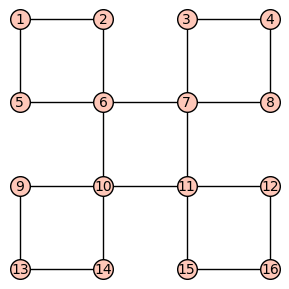

In [9]:
g = Graph([five_V, sum(five_E,[])], pos=five_pos)
pic1 = g.plot(figsize=[3,3])
pic1.show()

不難找到！但是亳無策略地走不見得每次都成功。

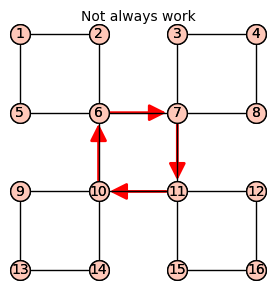

In [10]:
center_walk = DiGraph([five_V,five_E[0]], pos=five_pos)
pic1 += center_walk.plot(figsize=[3,3], edge_color='red')
pic1.axes(False)
pic1.show(title='Not always work')

#### 觀察
如果圖中每個點度數皆為偶數，  
從任一點開始走，  
遇到邊就往前走，  
過程中一直都只有起點和終點的度數為奇數，  
所以不能再走的時候  
一定是回到起點，形成了一個迴圈。

#### 觀察
如果圖 $G$ 每個點度數皆為偶數  
那麼在把某迴圈中的邊  
都從 $G$ 中去掉之後  
新的圖中每個點度數依然皆為偶數。

In [12]:
@interact

def _(step=slider(list(range(10)))):
    base = step // 2
    has_walk = step % 2
    base_graph = Graph([five_V,sum(five_E[base:],[])], pos=five_pos)
    pic1 = base_graph.plot(figsize=[3,3])
    if has_walk:
        walk_graph = DiGraph([five_V,five_E[base]], pos=five_pos)
        pic1 += walk_graph.plot(figsize = [3,3], edge_color = rainbow(5)[base])
    pic1.axes(False)
    pic1.show()

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MGUyNmIxYjg+IHdpdGggMSB3aWRnZXQKICBzdGVwOiBTZWxlY3Rpb25TbGlkZXIoZGVzY3JpcHRpb249dSdzdGVwJyzigKY=


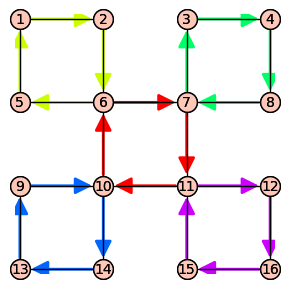

In [13]:
base_graph = Graph([five_V,sum(five_E,[])], pos=five_pos)
walk_graph = DiGraph([five_V,sum(five_E,[])], pos=five_pos)
pic1 = base_graph.plot(figsize=[3,3])
pic1 += walk_graph.plot(figsize = [3,3], edge_colors={rainbow(5)[k]: five_E[k] for k in range(5)} )
pic1.axes(False)
pic1.show()

#### 歐拉定理的證明
**前提：**  
1. 圖 $G$ 上每個點度數皆為偶數
2. 圖 $G$ 是連通的

**演算法：**  
1. 把圖 $G$ 的邊分解成一堆迴圈  \[By 前提 1\]
2. 從任一迴圈開始
3. 當遇到沒碰過的迴圈時，**先走新的迴圈**
4. 最終每個迴圈都會被走過 \[By 前提 2\]
5. 這樣就找到一個歐拉迴圈了！

![Algorithm for finding an Eulerian circuit](five_eulerian.gif)

## 2. 多面體公式（Euler's polyhedron formula）
假設一個多面體有的點數為 $V$，邊數為 $E$，而面數為 $F$。  
則 $V-E+F = 2$。

In [14]:
@interact
def _(
    faces = selector([4,6,8,12,20], buttons=True)
    ):
    f_to_g = {4: graphs.TetrahedralGraph(), 6: graphs.HexahedralGraph(), 8: graphs.OctahedralGraph(), 12: graphs.DodecahedralGraph(), 20: graphs.IcosahedralGraph()}
    g = f_to_g[faces]
    print('V - E + F = {} - {} + {} = {}'.format(g.order(), g.size(), faces, g.order() - g.size() + faces))
    g.plot3d().show()

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MGUyNWQ0ODg+IHdpdGggMSB3aWRnZXQKICBmYWNlczogVG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J2ZhY2VzJyzigKY=


#### 結果
正多面體只有以下五種：  
正四面體、正六面體、正八面體、正十二面體、正二十面體。

#### 證明
正多面體的面只能是正三角形、正方形、或是正五邊形。  
（正六邊形的內角太大，三個正六邊形就變成平面了，無法組成正多面體。)  

令 $k$ 為每個點的度數。

**1.  面為正三角形**  
每個面有三條邊，每條邊碰到兩個面，所以 $3F = 2E \implies F = \frac{2}{3}E$。  

因為正三角形內角為 $60^\circ$，$k$ 可以是 $3,4,5$。  

**1a.  $k=3$**  
每個點碰到三條邊，每條邊碰到兩個點，所以 $3V = 2E \implies V = \frac{2}{3}E$。  
利用多面體公式  
$V-E+F = \frac{2}{3}E - E + \frac{2}{3}E = 2$  
得到  
$2E - 3E + 2E = 6 \implies E = 6$。  
**因此** $V=4, E=6, F=4$： 正四面體。

**1b.  $k=4$**  
每個點碰到四條邊，每條邊碰到兩個點，所以 $4V = 2E \implies V = \frac{1}{2}E$。  
利用多面體公式  
$V-E+F = \frac{1}{2}E - E + \frac{2}{3}E = 2$  
得到  
$3E - 6E + 4E = 12 \implies E = 12$。  
**因此** $V=6, E=12, F=8$： 正八面體。

**1c.  $k=5$**  
每個點碰到五條邊，每條邊碰到兩個點，所以 $5V = 2E \implies V = \frac{2}{5}E$。  
利用多面體公式  
$V-E+F = \frac{2}{5}E - E + \frac{2}{3}E = 2$  
得到  
$6E - 15E + 10E = 30 \implies E = 30$。  
**因此** $V=12, E=30, F=20$： 正二十面體。

**2.  面為正方形**  
每個面有四條邊，每條邊碰到兩個面，所以 $4F = 2E \implies F = \frac{1}{2}E$。  

因為正方形內角為 $90^\circ$，$k$ 只能是 $3$。  

這樣的話，每個點碰到三條邊，每條邊碰到兩個點，所以 $3V = 2E \implies V = \frac{2}{3}E$。  
利用多面體公式  
$V-E+F = \frac{2}{3}E - E + \frac{1}{2}E = 2$  
得到  
$4E - 6E + 3E = 12 \implies E = 12$。  
**因此** $V=8, E=12, F=6$： 正六面體。

**3.  面為正五邊形**  
每個面有五條邊，每條邊碰到兩個面，所以 $5F = 2E \implies F = \frac{2}{5}E$。  

因為正五邊形內角為 $108^\circ$，$k$ 只能是 $3$。  

這樣的話，每個點碰到三條邊，每條邊碰到兩個點，所以 $3V = 2E \implies V = \frac{2}{3}E$。  
利用多面體公式  
$V-E+F = \frac{2}{3}E - E + \frac{2}{5}E = 2$  
得到  
$10E - 15E + 6E = 30 \implies E = 30$。  
**因此** $V=20, E=30, F=12$： 正十二面體。  

搞定～！

#### 觀察
每個多面體的圖都可以被畫在平面上  
而且邊都沒有交叉。  

多面體的其中一個面會變成平面上的**外平面（outer face）**。

![Platonic solids on a plane](planar_solids.gif "Platonic solids on a plane")



#### 定義
一個圖若可以畫在平面上  
且邊都沒有交叉  
則稱為一個**平面圖（planar graph）**。

#### 觀察
每一個多面體的圖都是平面圖。  
每一個**圈圖（Cycle）**都是平面圖。

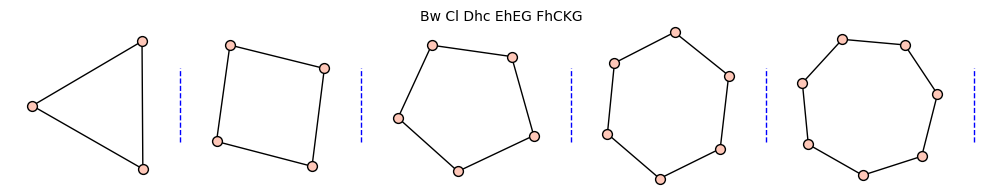

In [15]:
multi_sshow([graphs.CycleGraph(k).graph6_string() for k in range(3,8)])

#### 定理  
假設 $G$ 是一個連通的圖且包含至少一個圈。  
若 $G$ 被畫在平面上且邊無交叉時  
有 $V$ 個點，$E$ 條邊，以及 $F$ 個面，  
那麼 $V-E+F=2$。

#### 觀察  
一個 $n$ 個點的圈圖符何 $V-E+F = n-n+2 = 2$。

#### 觀察
假設圖 $G$ 滿足定理所有條件。  
那麼 $G$ 可以從圈圖開始，並只用以下兩種動作建構出來：  
1. 新增一個點並將這個點連到原先的某一點
2. 新增一條邊

**試試看：**Radoslav Kirov's [JavaScript Graph Editor](https://radokirov.com/graph-editor.js/)。

#### 定理證明
數學歸納法！  

動作 1:  
$V'=V+1$, $E'=E+1$, $F'=F$  
所以 $V'-E'+F' = (V+1)-(E+1)+F = 2$。

動作 2:  
$V'=V$, $E'=E+1$, $F'=F+1$  
所以 $V'-E'+F' = V-(E+1)+(F+1) = 2$。

搞定～！

## 3. 圖著色問題（Graph coloring problem）

軼事：  
**Francis Guthrie** 在 1852 年時發現英格蘭的地圖可以只用**四種顏色**著色。  
Francis 跟他弟弟 Frederick 說，他弟弟跟他指導教授  **Augustus De Morgan**說。  

> **四色問題：** 是不是每一張地圖都可以只用_四種顏色_著色，且相鄰地區不同色？

很多人嘗試回答這個問題：  
**Alfred Kempe** 在 **1879** 提出一個證明；  
**Peter Guthrie Tait** 在 **1880** 提出另一個證明。  
**Percy Heawood** 在 **1890** 發現 Kempe 的證明有錯；  
**Julius Petersen** 在 **1891** 發現 Tait 的證明有錯。

![A world map in four colors](world_map_four_colors.png "A world map in four colors")

(Source:  [Wikipedia: Four color theorem](https://en.wikipedia.org/wiki/Four_color_theorem))

![Simplify a map to a planar graph](color_planar.png "Simplify a map to a planar graph")

(Source:  [Wikipedia: Four color theorem](https://en.wikipedia.org/wiki/Four_color_theorem))

藉由地圖和平面圖的轉換，可以改寫原本的問題。

> **四色問題：**是不是每一個平面圖的點都可以只用_四種顏色_著色，且相鄰點不同色？

每個正多面體的圖都可以用四種顏色著色。

In [16]:
g = graphs.TetrahedralGraph()
g.set_pos({0:(0,0), 1:(0,1), 2:(0.8,-0.5), 3:(-0.8,-0.5)})
illustrate_FS(g,0,'BFS',searching_tree=False,coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MDg2ODJkZTg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


In [17]:
g = graphs.HexahedralGraph()
g.set_pos({0:(0,3), 1:(3,3), 2:(3,0), 3:(0,0), 4:(1,2), 5:(2,2), 6:(2,1), 7:(1,1)})
illustrate_FS(g,0,'BFS',searching_tree=False,coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MDdiMjFiMTg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


In [18]:
g = graphs.OctahedralGraph()
illustrate_FS(g,0,'BFS',searching_tree=False,coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MDg2ODI0ODg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


In [19]:
g = graphs.DodecahedralGraph()
illustrate_FS(g, 0, 'BFS', searching_tree=False, coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MDc5ZmM4YzA+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


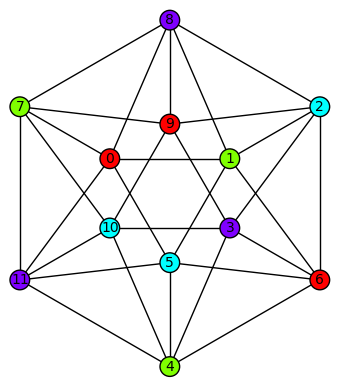

In [20]:
g = graphs.IcosahedralGraph()
g.show(vertex_colors=g.coloring(hex_colors=True))

#### 圖著色問題

> **圖著色問題：**給定一個圖，最少要用幾種顏色將點著色，才能相鄰不同色？

這個最少的點數叫做這個圖的**著色數（chromatic number）** $\chi(G)$。

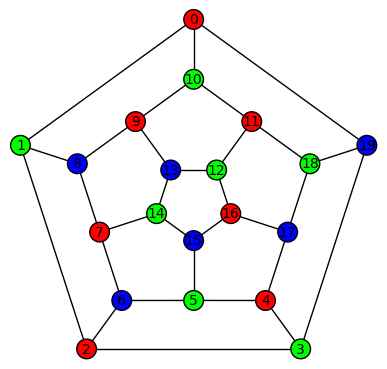

In [21]:
g = graphs.DodecahedralGraph()
g.show(vertex_colors=g.coloring(hex_colors=True))

#### 四色定理（Robertson, Sanders, Seymour, and Thomas 1997）
任何平面圖都能用四種顏色將點著色，且相鄰點不同色。

**四色定理的證明仰賴大量電腦計算。**

## 4. 搜尋演算法（Searching algorithm）
圖上的搜尋演算法  
目的是在圖上**有系統地**搜尋所有點（或是邊、或是都找）。

以下是兩種常見的搜尋演算法：  
1. 深度優先搜尋 Depth-first search（DFS）
2. 廣度優先搜尋 Breadth-first search（BFS）

下方的圖叫作 **Petersen graph**。

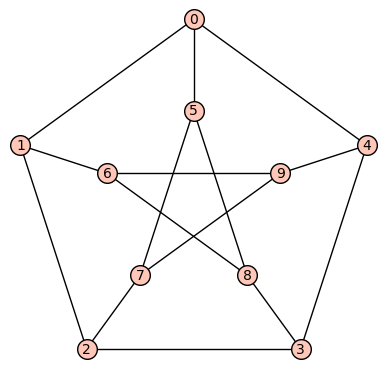

In [22]:
g = graphs.PetersenGraph()
g.show()

### 深度優先搜尋 Depth-first search（DFS）
能往前就往前  
不能再往前時，往回退到還能往前的點繼續。  

例子：走迷宮。

In [23]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'DFS')

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MDc1MmQzMjA+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


### 廣度優先搜尋 Breadth-first search（BFS） 
先把附近找完  
附近沒了，再從第一個附近還沒找完的點繼續。

例子：找兩點之間的最短路徑。

In [24]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'BFS')

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MDc0YTU0MTA+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


### 貪婪著色演算法  
圖的點要給定一個順序。  
依照這個順序一一著色，  
著色時能不用新顏色就不用新顏色。

In [25]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'BFS', coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MGU5NWMwYzg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


In [26]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'DFS', coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MDc3ZjAxYjg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


**不同的點的順序會決定著出來的顏色。**

#### 定義
若 $G$ 是一個圖，  
$\Delta(G)$ 代表的是圖上的**最大度數**，而  
$\delta(G)$ 代表的是圖上的 **最小度數**。

#### 觀察
貪婪著色演算法（任何的點的順序都行）至多用到 $\Delta(G)+1$ 種顏色。  
所以 $\chi(G)\leq \Delta(G)+1$。

當圖是**奇圈（odd cycle）** $C_{2k+1}$ 時：  
$\Delta(C_{2k+1})=2$  
$\chi(C_{2k+1})=2+1=3$

In [27]:
g = graphs.CycleGraph(5)
illustrate_FS(g, 0, 'DFS', searching_tree=False, coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE2MGUxZTYyMzA+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


當圖是**完全圖（complete graph）** $K_n$ 時：  
$\Delta(K_n)=n-1$  
$\chi(K_n)=n-1 + 1=n$

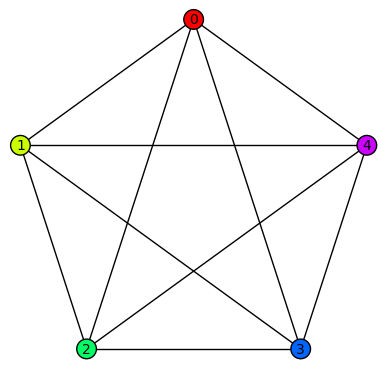

In [28]:
g = graphs.CompleteGraph(5)
g.show(vertex_colors=g.coloring(hex_colors=True))

#### Brook's theorem
若一個圖不是奇圈也不是完全圖，  
則 $\chi(G)\leq \Delta(G)$。

**Brook's theorem 的證明仰賴 DFS。**

### Enjoy!  Thanks!

**Below is not part of the lecture**

In [6]:
### Necessary code:  Run this cell first!

load("https://raw.githubusercontent.com/jephianlin/minimum_rank_aux/master/general_Lib.sage");

five_V = list(range(1,17))
five_E = [[(6,7),(7,11),(11,10),(10,6)],[(1,2),(2,6),(6,5),(5,1)],[(3,4),(4,8),(8,7),(7,3)],[(9,10),(10,14),(14,13),(13,9)],[(11,12),(12,16),(16,15),(15,11)]]
five_pos = {k: ((k-1) % 4, -((k-1) // 4) ) for k in five_V}

def walk_on_graph(G):
    ### edges of g has to be labeled as e1,...,em. 
    walked = []
    m = G.size()
    n = G.order()
    V = G.vertices()
    E = G.edges()
    
    @interact
    def _(
        next_step = selector(['e{}'.format(k) for k in range(1,m+1)], buttons=True),
        new_game = selector(['restart', 'continue'], default = 'continue', buttons=True)
        ):
        if new_game == 'continue':
            if next_step not in walked:
                walked.append(next_step)
        if new_game == 'restart':
            while walked:
                discard = walked.pop()
        print(walked)
        walked_edges = [edge for edge in E if edge[2] in walked]
        G.show(figsize=[3,3],edge_labels=True, edge_colors={'red': walked_edges})
        
def DFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.depth_first_search(v):
        if searched:
            for i in range(1,len(searched)+1):
                if g.has_edge(new,searched[-i]):
                    parent = searched[-i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def BFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.breadth_first_search(v):
        if searched:
            for i in range(len(searched)):
                if g.has_edge(new,searched[i]):
                    parent = searched[i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def greedy_coloring(g, color_order=None):
    n = g.order()
    ### ideally, len(color_order) == n
    if color_order == None:
        color_order = g.vertices()
    color_order = list(color_order) ### change the type in case it is a generator
    num_c = {k: [] for k in range(n)}
    for s in range(n):
        new = color_order[s]
        for k in range(n):
            for u in num_c[k]:
                if g.has_edge(u,new):
                    break;
            else:
                num_c[k].append(new)
                break;
    num_c_used = [k for k in range(n) if num_c[k]]
    greedy_chi = len(num_c_used)
    colors = rainbow(greedy_chi) 
    c = {colors[k]: num_c[k] for k in range(greedy_chi)}
    return c

def illustrate_FS(g, v, alg='DFS', searching_tree=True, coloring=False):
    ### g should have its position saved
    ### if not do g.plot(save_pos) first
    if alg == 'DFS':
        arcs = DFS_tree(g,v)
        full_name = 'Depth-First Search at {}'.format(v)
    if alg == 'BFS':
        arcs = BFS_tree(g,v)
        full_name = 'Breadth-First Search at {}'.format(v)
    steps = len(arcs)
    pic1 = g.plot()
    
    if coloring:
        color_order = [v] + [arc[1] for arc in arcs]
        c = greedy_coloring(g, color_order)
    else:
        c = {}
        
    @interact
    def _(step=slider(list(range(steps+1))), t = text_control(full_name)):
        g_pos = g.get_pos()
        arcs_show = arcs[:step] if searching_tree else []
        pic2 = DiGraph([g.vertices(),arcs_show], pos=g_pos).plot(edge_color='red', vertex_colors=c)
        unreached = [arc[1] for arc in arcs[step:]]
        cover = Graph([unreached,[]], pos={u: g_pos[u] for u in unreached}).plot()
        p = pic1 + pic2 + cover
        p.axes(False)
        p.show()

---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.


In [ ]:
### No need to run this cell
### Code for generating the five_eulerian.gif

# a = sum(five_E,[])
# b = sum([[rainbow(5)[k]] * 4 for k in range(5)],[])
# zip(a,b)

enc = [
 ((13, 9), '#0066ff'),    
 ((9, 10), '#0066ff'),
 ((10, 6), '#ff0000'),
 ((6, 5), '#cbff00'),
 ((5, 1), '#cbff00'),
 ((1, 2), '#cbff00'),
 ((2, 6), '#cbff00'),
 ((6, 7), '#ff0000'),
 ((7, 3), '#00ff66'),
 ((3, 4), '#00ff66'),    
 ((4, 8), '#00ff66'),
 ((8, 7), '#00ff66'),    
 ((7, 11), '#ff0000'),
 ((11, 12), '#cc00ff'),
 ((12, 16), '#cc00ff'),
 ((16, 15), '#cc00ff'),
 ((15, 11), '#cc00ff'),    
 ((11, 10), '#ff0000'),
 ((10, 14), '#0066ff'),
 ((14, 13), '#0066ff')
]

def categorize(partial_enc):
    c = {}
    for pair in partial_enc:
        if pair[1] not in c.keys():
            c[pair[1]] = [pair[0]]
        else:
            c[pair[1]].append(pair[0])
    return c

pics = []

for i in range(21):
    E = [pair[0] for pair in enc[:i]]
    base_graph = Graph([five_V, sum(five_E,[])], pos=five_pos)
    pic1 = base_graph.plot(figsize=[3,3])
    c = categorize(enc[:i])

    walk_graph = DiGraph([five_V, E], pos=five_pos)
    pic1 += walk_graph.plot(figsize=[3,3], edge_colors=c)
    pic1.axes(False)
    pics.append(pic1)
    #pic1.show()
    
five_animate = animate((pic for pic in pics))
five_animate

#five_animate.gif(savefile='five_eulerian_test.gif')

In [ ]:
five_animate.gif(savefile='five_eulerian_test.gif')